In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import re

In [2]:
df_cleaned = pd.read_csv('C:\\Users\\SOUTH\\Desktop\\ADS_Project2\\dataset\\df_cleaned.csv')

In [3]:
# 定义函数处理每个值
def clean_sa2_name(name):
    # 将所有值先转换为字符串类型
    name = str(name)
    
    # 处理 Melbourne CBD 特例
    if "Melbourne CBD" in name:
        return "CBD"
    
    # 去除括号及括号中的内容
    name_cleaned = re.sub(r'\s*\(.*?\)\s*', '', name)
    
    # 去掉减号及其后的内容
    name_cleaned = re.sub(r'\s*-\s*.*', '', name_cleaned)
    
    # 去掉末尾的东南西北（不区分大小写）
    name_cleaned = re.sub(r'\s+(East|West|North|South)$', '', name_cleaned, flags=re.IGNORECASE)
    
    return name_cleaned.strip()

# 使用apply函数对SA2_NAME21列进行处理
df_cleaned['SA2_NAME21_cleaned'] = df_cleaned['SA2_NAME21'].apply(clean_sa2_name)

# 打印部分结果以确认
print(df_cleaned[['SA2_NAME21', 'SA2_NAME21_cleaned']].head())

                    SA2_NAME21 SA2_NAME21_cleaned
0  Richmond (South) - Cremorne           Richmond
1                    Footscray          Footscray
2  Richmond (South) - Cremorne           Richmond
3                     Armadale           Armadale
4          South Yarra - North        South Yarra


In [4]:
# 用新的列SA2_NAME21_cleaned替换旧的列SA2_NAME21
df_cleaned['SA2_NAME21'] = df_cleaned['SA2_NAME21_cleaned']

# 删除不再需要的SA2_NAME21_cleaned列
df_cleaned.drop(columns=['SA2_NAME21_cleaned'], inplace=True)

# 打印确认替换是否成功
df_cleaned


,Property Name,Property Latitude,Property Longitude,Station Distance (km),School Distance (km),SA2_NAME21,Distance to Closest Shopping Center (km),rent price,bedrooms,bathrooms,parking_spots
0,"6/137 Coppin St, Richmond VIC 3121",-37.820283,145.003572,0.882026,0.326233,Richmond,9.543373,425.0,1.0,1.0,0.0
1,"205/6 Joseph Road, Footscray VIC 3011",-37.798238,144.914181,0.990486,0.723669,Footscray,3.431348,510.0,1.0,1.0,1.0
2,"8/7 Docker St, Richmond VIC 3121",-37.823681,144.997096,0.308573,0.676342,Richmond,10.037550,425.0,1.0,1.0,1.0
3,"8/51 Kooyong Road, Armadale VIC 3143",-37.862342,145.019539,0.658460,0.917637,Armadale,6.446263,375.0,1.0,1.0,1.0
4,"10/54 Rockley Road, South Yarra VIC 3141",-37.835164,145.000360,0.785119,0.360197,South Yarra,9.419477,475.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2803,"13 Adelaide St, Blairgowrie VIC 3942",-38.367311,144.785258,34.419625,3.431329,Point Nepean,54.130591,850.0,5.0,3.0,1.0
2804,"160 Moore rd, Sunbury VIC 3429",-37.608981,144.711509,2.216868,1.528344,Sunbury,11.078158,1100.0,5.0,2.0,0.0
2805,"4 Vital drive, Tarneit VIC 3029",-37.858304,144.647505,3.788183,1.152332,Tarneit,5.051280,550.0,5.0,2.0,1.0
2806,"14 Sheffield Way, Keysborough VIC 3173",-38.000807,145.149657,4.452369,0.542452,Keysborough,13.587161,625.0,5.0,2.0,1.0


In [5]:
# 加载数据
file_path2 = 'C:\\Users\\SOUTH\\Desktop\\ADS_Project2\\dataset\\increase_rates(3).csv'  # 替换为你的文件路径
df2 = pd.read_csv(file_path2)

In [6]:
df2

,Mar 2022 Median Rent,Jun 2022 Median Rent,Sep 2022 Median Rent,Dec 2022 Median Rent,Mar 2023 Median Rent,Mar 2017 Median Rent,Jun 2017 Median Rent,Sep 2017 Median Rent,Dec 2017 Median Rent,Mar 2018 Median Rent,...,Sep 2020 to Dec 2020 % Increase,Dec 2020 to Mar 2021 % Increase,Mar 2021 to Jun 2021 % Increase,Jun 2021 to Sep 2021 % Increase,Sep 2021 to Dec 2021 % Increase,Dec 2021 to Mar 2022 % Increase,Mar 2022 to Jun 2022 % Increase,Jun 2022 to Sep 2022 % Increase,Sep 2022 to Dec 2022 % Increase,Dec 2022 to Mar 2023 % Increase
0,500.0,515.0,500.0,525.0,545.0,500.0,515.0,500.0,525.0,500.0,...,5.000000,-4.761905,3.000000,-2.912621,5.000000,-4.761905,3.000000,-2.912621,5.000000,3.809524
1,500.0,515.0,500.0,525.0,545.0,500.0,515.0,500.0,525.0,500.0,...,5.000000,-4.761905,3.000000,-2.912621,5.000000,-4.761905,3.000000,-2.912621,5.000000,3.809524
2,500.0,515.0,500.0,525.0,545.0,500.0,515.0,500.0,525.0,500.0,...,5.000000,-4.761905,3.000000,-2.912621,5.000000,-4.761905,3.000000,-2.912621,5.000000,3.809524
3,430.0,450.0,450.0,460.0,490.0,430.0,450.0,450.0,460.0,430.0,...,2.222222,-6.521739,4.651163,0.000000,2.222222,-6.521739,4.651163,0.000000,2.222222,6.521739
4,580.0,595.0,600.0,600.0,620.0,580.0,595.0,600.0,600.0,580.0,...,0.000000,-3.333333,2.586207,0.840336,0.000000,-3.333333,2.586207,0.840336,0.000000,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,360.0,380.0,380.0,380.0,385.0,360.0,380.0,380.0,380.0,360.0,...,0.000000,-5.263158,5.555556,0.000000,0.000000,-5.263158,5.555556,0.000000,0.000000,1.315789
211,370.0,380.0,380.0,380.0,380.0,370.0,380.0,380.0,380.0,370.0,...,0.000000,-2.631579,2.702703,0.000000,0.000000,-2.631579,2.702703,0.000000,0.000000,0.000000
212,400.0,400.0,420.0,430.0,440.0,400.0,400.0,420.0,430.0,400.0,...,2.380952,-6.976744,0.000000,5.000000,2.380952,-6.976744,0.000000,5.000000,2.380952,2.325581
213,400.0,400.0,420.0,420.0,420.0,400.0,400.0,420.0,420.0,400.0,...,0.000000,-4.761905,0.000000,5.000000,0.000000,-4.761905,0.000000,5.000000,0.000000,0.000000


In [7]:

desired_columns = [
    'District', 'Mar 2022 Median Rent', 'Jun 2022 Median Rent', 
    'Sep 2022 Median Rent', 'Dec 2022 Median Rent', 
    'Mar 2023 Median Rent'
]

# 只保留这些列
df2_selected = df2[desired_columns]

df2_selected

,District,Mar 2022 Median Rent,Jun 2022 Median Rent,Sep 2022 Median Rent,Dec 2022 Median Rent,Mar 2023 Median Rent
0,Albert Park,500.0,515.0,500.0,525.0,545.0
1,Middle Park,500.0,515.0,500.0,525.0,545.0
2,West St Kilda,500.0,515.0,500.0,525.0,545.0
3,Armadale,430.0,450.0,450.0,460.0,490.0
4,Carlton North,580.0,595.0,600.0,600.0,620.0
...,...,...,...,...,...,...
210,Traralgon,360.0,380.0,380.0,380.0,385.0
211,Wanagaratta,370.0,380.0,380.0,380.0,380.0
212,Warragul,400.0,400.0,420.0,430.0,440.0
213,Warrnambool,400.0,400.0,420.0,420.0,420.0


In [8]:
df_combined = pd.merge(df_cleaned, df2_selected, left_on='SA2_NAME21', right_on='District', how='left')

In [9]:
df_combined= df_combined.dropna(subset=['rent price'])
df_combined= df_combined.dropna(subset=['Mar 2022 Median Rent'])
df_combined

,Property Name,Property Latitude,Property Longitude,Station Distance (km),School Distance (km),SA2_NAME21,Distance to Closest Shopping Center (km),rent price,bedrooms,bathrooms,parking_spots,District,Mar 2022 Median Rent,Jun 2022 Median Rent,Sep 2022 Median Rent,Dec 2022 Median Rent,Mar 2023 Median Rent
0,"6/137 Coppin St, Richmond VIC 3121",-37.820283,145.003572,0.882026,0.326233,Richmond,9.543373,425.0,1.0,1.0,0.0,Richmond,460.0,475.0,495.0,510.0,550.0
1,"205/6 Joseph Road, Footscray VIC 3011",-37.798238,144.914181,0.990486,0.723669,Footscray,3.431348,510.0,1.0,1.0,1.0,Footscray,360.0,370.0,380.0,390.0,400.0
2,"8/7 Docker St, Richmond VIC 3121",-37.823681,144.997096,0.308573,0.676342,Richmond,10.037550,425.0,1.0,1.0,1.0,Richmond,460.0,475.0,495.0,510.0,550.0
3,"8/51 Kooyong Road, Armadale VIC 3143",-37.862342,145.019539,0.658460,0.917637,Armadale,6.446263,375.0,1.0,1.0,1.0,Armadale,430.0,450.0,450.0,460.0,490.0
4,"10/54 Rockley Road, South Yarra VIC 3141",-37.835164,145.000360,0.785119,0.360197,South Yarra,9.419477,475.0,1.0,1.0,1.0,South Yarra,400.0,410.0,429.0,444.0,480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,"1 Saxonwood Drive, Vermont South VIC 3133",-37.846538,145.171765,2.890586,0.248555,Vermont,3.651912,950.0,5.0,3.0,1.0,Vermont,455.0,475.0,490.0,500.0,510.0
2796,"18 View Street, St Albans VIC 3021",-37.743113,144.804401,0.449484,0.443826,St Albans,5.916822,688.0,5.0,3.0,1.0,St Albans,350.0,360.0,360.0,360.0,370.0
2797,Bentleigh East VIC 3165,-37.922020,145.066553,2.643499,0.399683,Bentleigh,4.485301,1200.0,5.0,2.0,1.0,Bentleigh,495.0,500.0,506.0,525.0,550.0
2800,"30 Council Street, Clifton Hill VIC 3068",-37.792560,144.986916,0.896084,0.207055,Clifton Hill,7.118279,1200.0,5.0,1.0,0.0,Clifton Hill,550.0,550.0,575.0,585.0,600.0


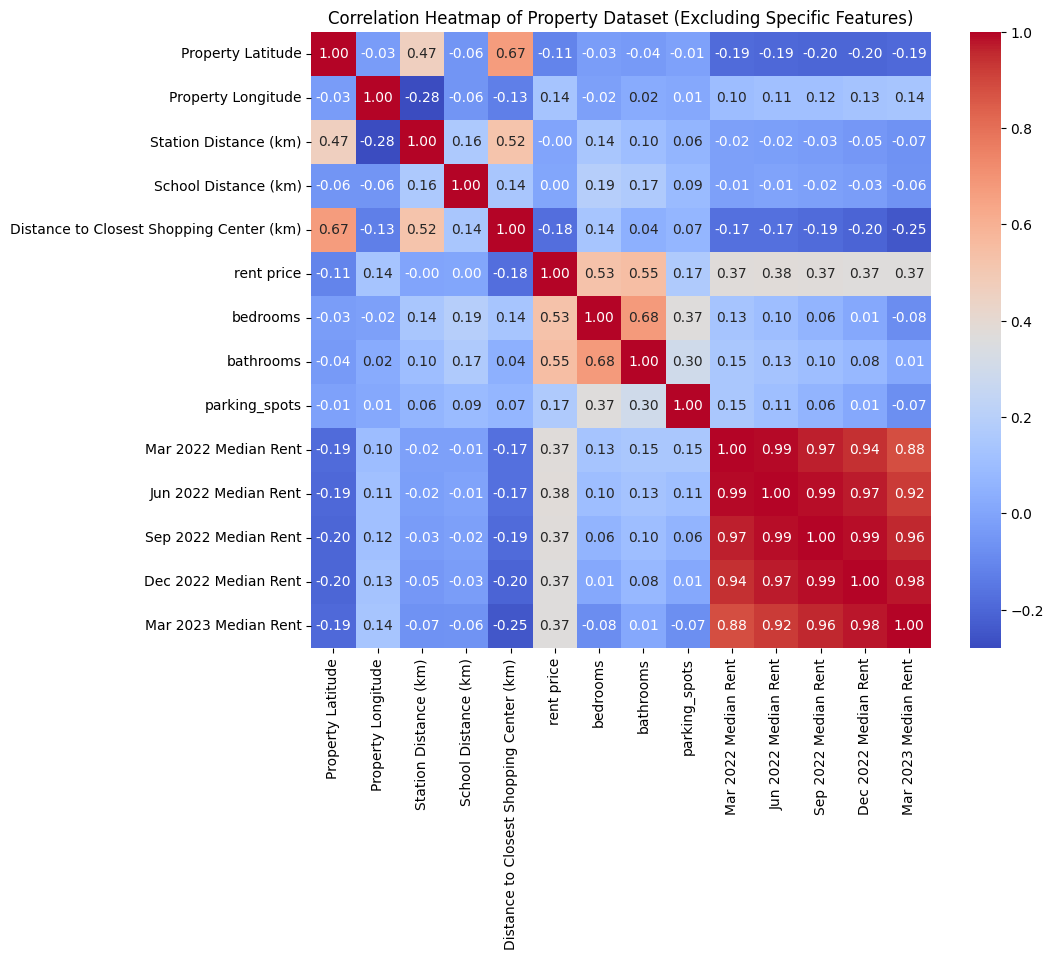

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is already loaded into a DataFrame named df

df_filtered = df_combined

# Select the remaining numerical columns
numerical_columns = df_filtered.select_dtypes(include=['float64', 'int64']).columns

# Create a correlation matrix
correlation_matrix = df_filtered[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Property Dataset (Excluding Specific Features)')
plt.show()


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# 读取数据
data = df_combined

# 选择特征和目标变量
features = ['Property Latitude', 'Property Longitude', 'Station Distance (km)', 'School Distance (km)', 
            'Distance to Closest Shopping Center (km)', 'bedrooms', 'bathrooms', 'parking_spots']

X = data[features]
y = data['rent price']

# 检查哪些特征适合标准化或归一化（例如：距离、房间数、停车位等）
# 这里我们选择距离和计数类特征进行标准化
scaler = StandardScaler()

# 标准化特征：距离相关和房间数量相关的特征
X[['Property Latitude', 'Property Longitude', 'Station Distance (km)', 'School Distance (km)',
   'Distance to Closest Shopping Center (km)', 'bedrooms', 'bathrooms', 'parking_spots']] = scaler.fit_transform(
    X[['Property Latitude', 'Property Longitude', 'Station Distance (km)', 'School Distance (km)',
       'Distance to Closest Shopping Center (km)', 'bedrooms', 'bathrooms', 'parking_spots']])

# 将历史租金保持原样，除非他们的数值范围也非常不同，可以同样标准化
# 分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化并训练Random Forest模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 预测
y_pred = rf.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 输出特征重要性
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# 打印重要特征
print("Feature ranking:")
for i in range(X.shape[1]):
    print(f"{i + 1}. feature {features[indices[i]]} ({importances[indices[i]]})")


C:\Users\SOUTH\AppData\Local\Temp\ipykernel_38060\2386873289.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Property Latitude', 'Property Longitude', 'Station Distance (km)', 'School Distance (km)',


Mean Squared Error: 11419.561110252018
Feature ranking:
1. feature Property Longitude (0.2596618183776744)
2. feature bathrooms (0.22853232953402983)
3. feature bedrooms (0.20240082447264368)
4. feature Property Latitude (0.12582564697992907)
5. feature Distance to Closest Shopping Center (km) (0.07794055794893168)
6. feature Station Distance (km) (0.050902428811666116)
7. feature School Distance (km) (0.049056254576871)
8. feature parking_spots (0.005680139298254322)


In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# 进行预测

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# 计算R squared（决定系数）
r2 = r2_score(y_test, y_pred)

# 输出 RMSE 和 R²
print(f'均方根误差 (RMSE): {rmse}')
print(f'决定系数 (R-squared): {r2}')


均方根误差 (RMSE): 106.862346550373
决定系数 (R-squared): 0.7673657779797699


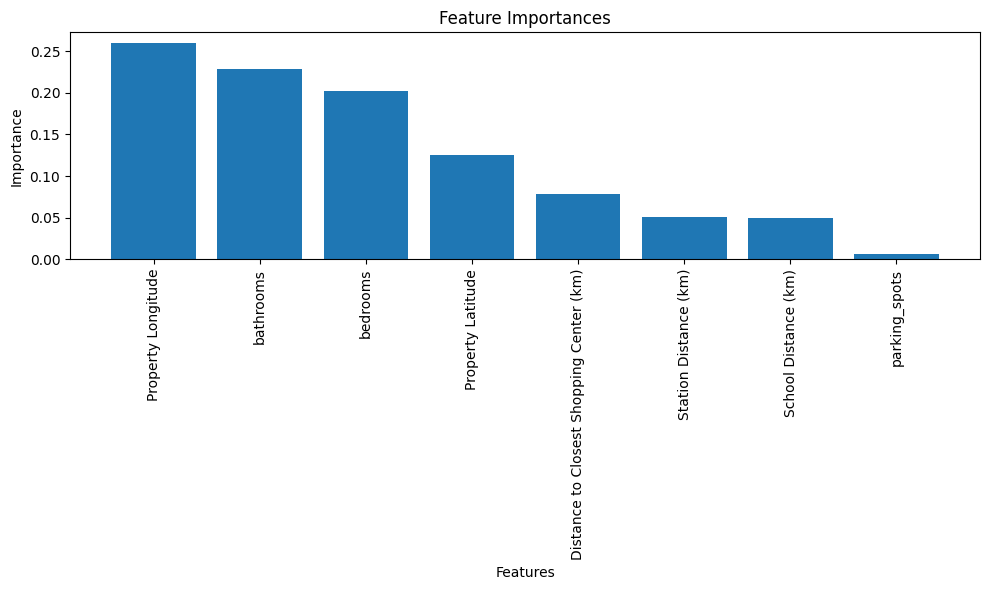

In [13]:
import matplotlib.pyplot as plt

# 绘制特征重要性条形图
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()
